# MODEL DEVELOPMENT AND EVALUATION
<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>
<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>
Some questions we want to ask in this module

<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>

## MODEL DEVELOPMENT: <p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
# Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the refined data 'Automobiule2.csv' on which model will be developed
bpd=pd.read_csv("Automobile2.csv")
bpd.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


### 1. SIMPLE LINEAR REGRESSION
<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>
$$
Y: Response \ Variable\\\\\\\\\\\\
X: Predictor \ Variables
$$
<b>Linear Function</b>
$$
Yhat = a + b  X
$$
<br>
<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [3]:
#Load the modules for Linear regression
from sklearn.linear_model import LinearRegression

#### FOR "highway-L/100km"

In [4]:
#Create Linear Regression object
lm=LinearRegression()
lm

LinearRegression()

In [5]:
# we will create a linear function with "highway-L/100km" as the predictor variable and the "price" as the response variable.
X=bpd[["highway-L/100km"]]
y=bpd["price"]

In [6]:
# Fit the linear model using "highway-L/100km":
lm.fit(X,y)

LinearRegression()

In [7]:
# output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [8]:
# What is the value of the intercept (a)?
lm.intercept_

-14617.843054664605

In [9]:
# What is the value of the slope (b)?
lm.coef_

array([3458.68511314])

<h4>What is the final estimated linear model we get?</h4>
As we saw above, we should get a final linear model with the structure:
$$
Yhat = a + b  X
$$
<b>Price</b> =-14617.84+3458.68*<b>highway-L/100km</b>

#### FOR ENGINE SIZE

In [10]:
lm1=LinearRegression()
lm1

LinearRegression()

In [11]:
# we will create a linear function with "engine-size" as the predictor variable and the "price" as the response variable.
X1=bpd[["engine-size"]]
y1=bpd["price"]

In [12]:
# Fit the linear model using "engine-size":
lm1.fit(X1,y1)

LinearRegression()

In [13]:
# output a prediction:
Yhat=lm1.predict(X1)
Yhat[0:5]   

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [14]:
#Value of a intercept
lm1.intercept_

-7963.338906281049

In [15]:
# Value of slope (b)
lm1.coef_

array([166.86001569])

<h4>What is the final estimated linear model we get?</h4>
As we saw above, we should get a final linear model with the structure:
$$
Yhat = a + b  X
$$
<b>Price</b> =-7963.33+166.86*<b>engine-size</b>

### 2. MULTIPLE LINEAR REGRESSION
<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>
$$
Y: Response \ Variable\\\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\\\
X\_2: Predictor\ Variable \ 2\\\\\\
X\_3: Predictor\ Variable \ 3\\\\\\
X\_4: Predictor\ Variable \ 4\\\\\\
$$
<BR>
$$
a: intercept\\\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\\\
$$
<BR>
<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>highway-L/100km</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [16]:
#Collecting the multiple independent variables required for predictions
Z=bpd[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [17]:
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z,bpd['price'])

LinearRegression()

In [18]:
# value of the intercept(a)?
lm.intercept_

-14382.16131516366

In [19]:
# values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([ 36.76149419,   3.50153554,  85.32658561, 498.91963877])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?
<br>
<b>Price</b> = -14382.16131516366 + 36.76149419 x <b>horsepower</b> + 3.50153554 x <b>curb-weight</b> + 85.32658561 x <b>engine-size</b> + 498.91963877 x <b>highway-L/100km</b>

## MODEL EVALUATION
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

#### REGRESSION PLOT
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 47712.19276573373)

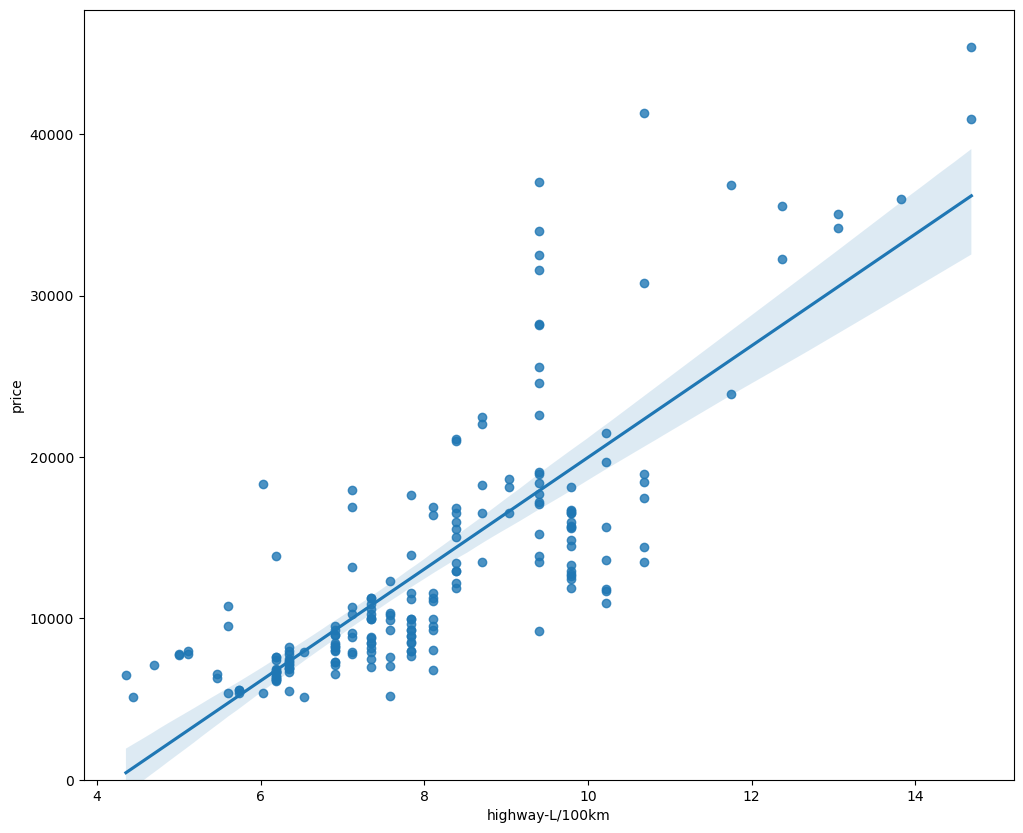

In [20]:
# visualize highway-L/100km as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=bpd)
plt.ylim(0,)

We can see from this plot that price is positive correlated to highway-mpg since the regression slope is positive.

(0.0, 47414.1)

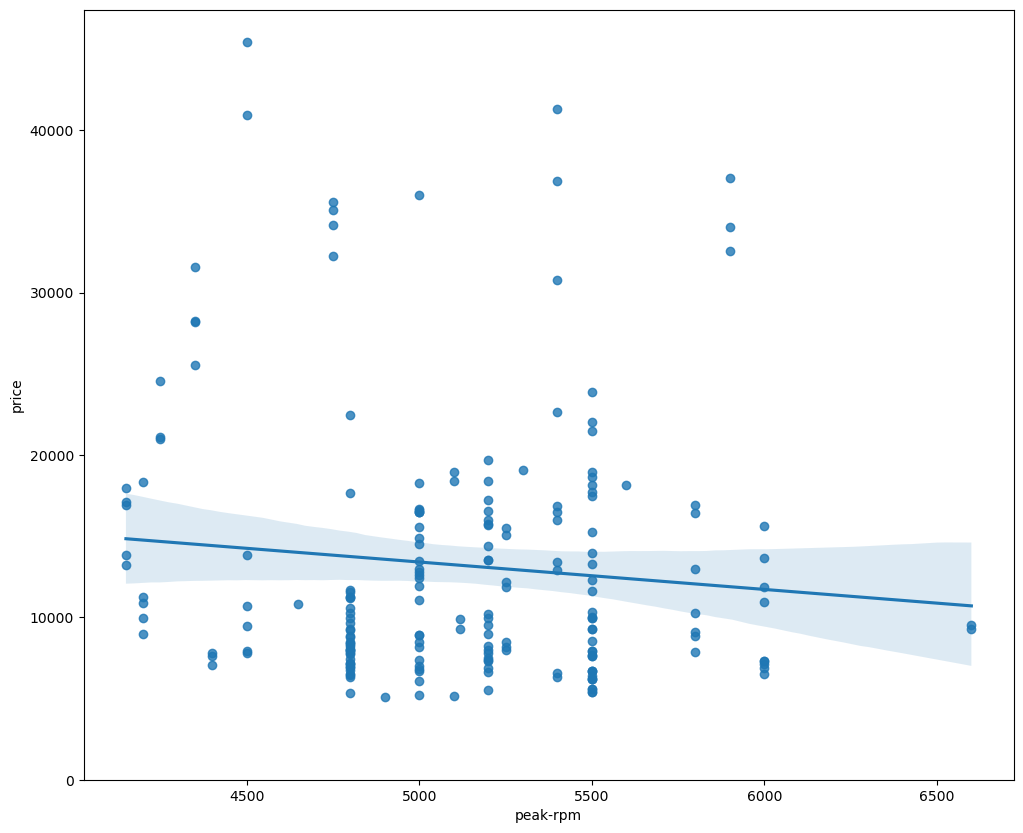

In [21]:
# the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=bpd)
plt.ylim(0,)

##### Comparing the regression plot of "peak-rpm" and "highway-L/100km", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [22]:
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? 
#Use the method ".corr()" to verify your answer
bpd[["highway-L/100km","peak-rpm",'price']].corr()


,highway-L/100km,peak-rpm,price
highway-L/100km,1.000000,0.017736,0.801118
peak-rpm,0.017736,1.000000,-0.101542
price,0.801118,-0.101542,1.000000


##### The variable "highway-L/100km" has a stronger correlation with "price"0.801118, it is approximate  compared to "peak-rpm" which is approximate -0.101542. 

#### RESIDUAL PLOT
<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


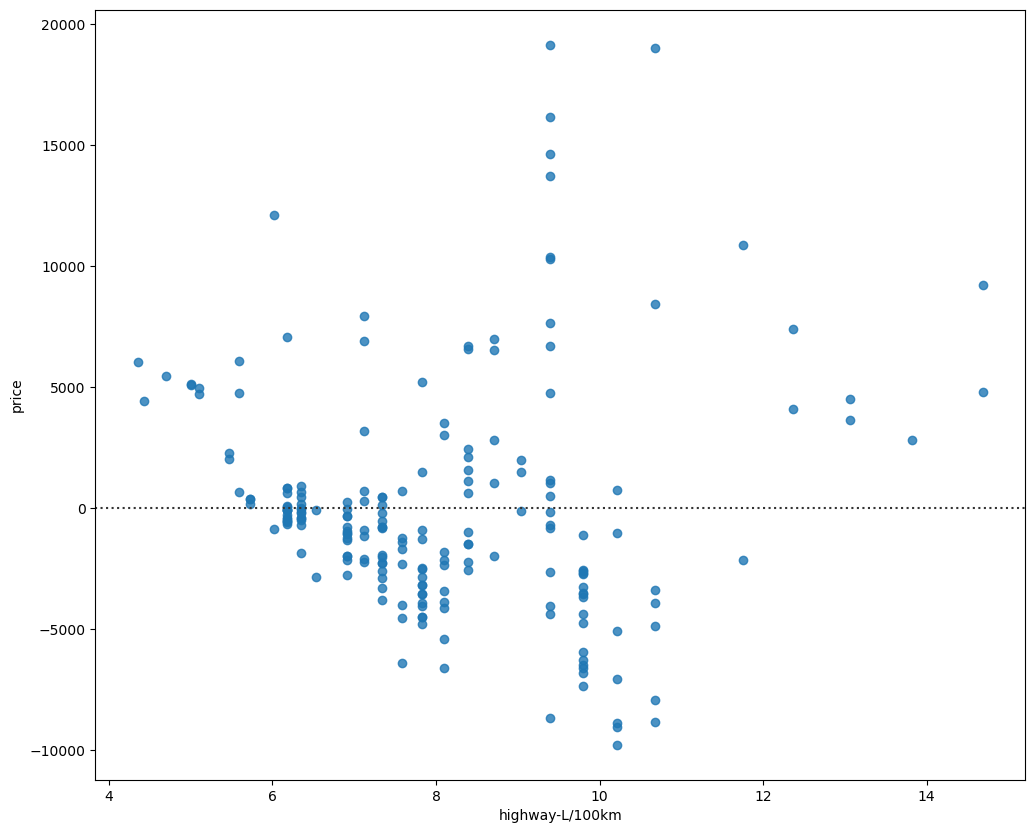

In [23]:
# For highway-L/100km vs price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=bpd['highway-L/100km'],y=bpd['price'])
plt.show()

##### We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### MODEL VISUALIZATION FOR MULTIPLE REGRESSION MODEL
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

In [24]:
#Making predictions for the variable storing features
Y_hat = lm.predict(Z)

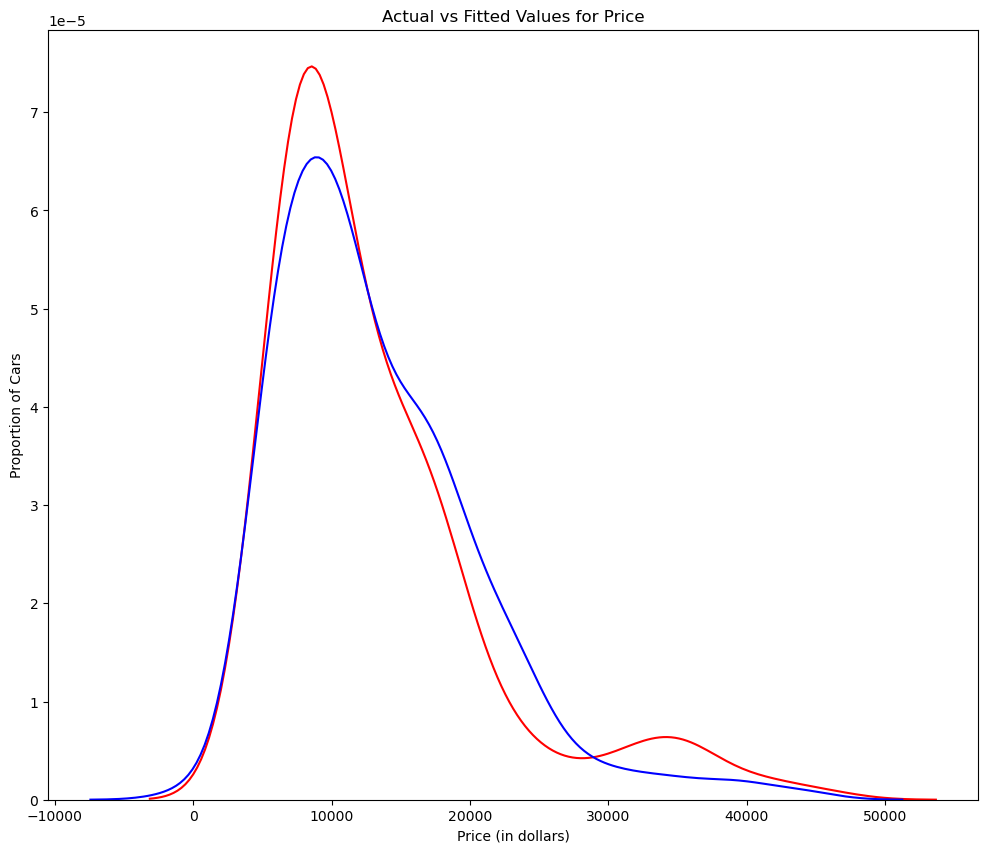

In [25]:
# the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.
plt.figure(figsize=(width, height))


ax1 = sns.distplot(bpd['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

<h3>3. Polynomial Regression and Pipelines</h3>
<br>
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
<br>
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\\\
$$
<br>
<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


In [26]:
# function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [27]:
x = bpd['highway-L/100km']
y = bpd['price']

In [28]:
# fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


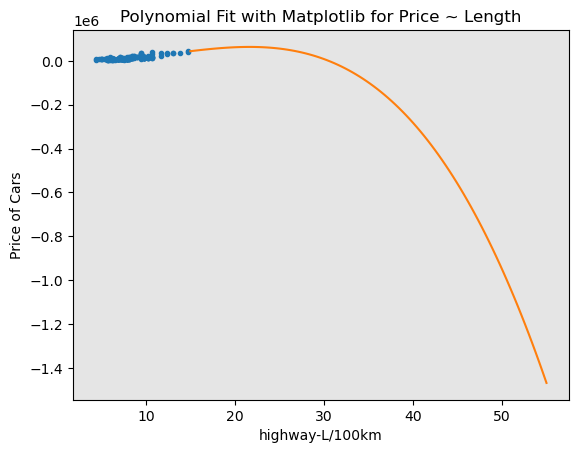

In [29]:
PlotPolly(p, x, y, 'highway-L/100km')

In [30]:
np.polyfit(x, y, 3)

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


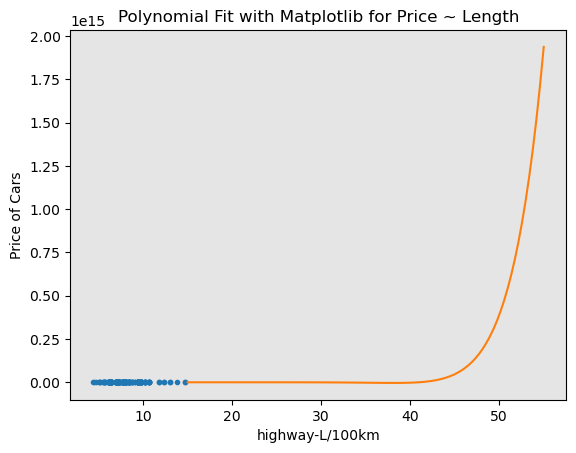

In [31]:
# 11 order polynomial model with the variables x and y from above.
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'highway-L/100km')


### Perform a polynomial transform on multiple features.

In [32]:
# create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [33]:
Z.shape

(201, 4)

In [34]:
#fitting the polynomial features on selected features
Z_pr=pr.fit_transform(Z)

In [35]:
Z_pr.shape

(201, 15)

### PIPELINE
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
#create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [38]:
#  input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
#First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
#Then, we can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [40]:
# Similarly,  we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12396.25072589, 12396.25072589, 18427.88376418,  9983.16028344])

In [41]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([14055.18192433, 14055.18192433, 18643.05058857, 10759.40130978,
       16667.53138368, 14734.21288344, 15914.23035921, 16299.39926822,
       18610.27500783, 10975.16794064])

### IN SAMPLE MEASURES EVALUATION
<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


### 1. LINEAR REGRESSION

In [42]:
# For highway-L/100km R^2
lm.fit(X, y)
# Find the R^2
print('The R-square is: ', lm.score(X, y))

The R-square is:  0.6417894513258818


###### We can say that ~64.18% of the variation of the price is explained by this simple linear model, which we have built using the highway-L/100km data.

In [43]:
# For highway-L/100km MSE
from sklearn.metrics import mean_squared_error

In [44]:
# predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [15485.52737455 15485.52737455 16643.34931414 12475.19033163]


In [45]:
#compare the predicted results with the actual results:
mse = mean_squared_error(bpd['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.777085222


### 2. MULTIPLE LINEAR REGRESSION

In [46]:
# fit the model 
lm.fit(Z, bpd['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, bpd['price']))

The R-square is:  0.8118544998135149


We can say that ~81.18 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [47]:
# calculate the MSE.
#We produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [48]:
# We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(bpd['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11823374.64400718


### 3. POLYNOMIAL REGRESSION

In [49]:
# import the function r2_score from the module metrics
from sklearn.metrics import r2_score

In [50]:
# apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.675358166081217


We can say that ~67.5358 % of the variation of price is explained by this polynomial fit.

In [51]:
# calculate the MSE:
mean_squared_error(bpd['price'], p(x))

20401030.18001941

## PREDICTION 
<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction.

In [52]:
# Create a new input:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [53]:
#Fit the model:
lm.fit(X, y)
lm

LinearRegression()

In [54]:
# Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

array([-11159.15794152,  -7700.47282838,  -4241.78771523,   -783.10260209,
         2675.58251105])

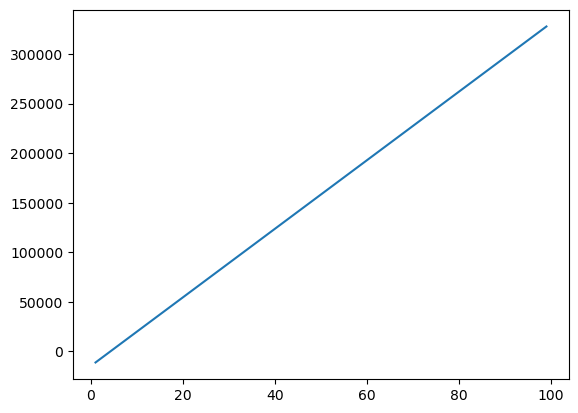

In [55]:
# We can plot the data:
plt.plot(new_input, yhat)
plt.show()

## DECISION MAKING

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6417894513258818</li>
    <li>MSE: 2.25 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.8118544998135149</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.675358166081217</li>
    <li>MSE: 2.04 x 10^7</li>
</ul>
</p>

<h3>CONCLUSION</h3>
<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 30 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>


In [56]:
# SAVING THE FILE FOR MODEL BUILDING
bpd.to_csv("Automobile3.csv")

# MODEL EVALUATION AND REFINEMENT
* Evaluate and refine prediction models

<h2>Functions for Plotting</h2>
* Using two functions for visualtion of the models test and training models

In [57]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [58]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>

In [59]:
# the target data price in a separate dataframe y_data:
y_data = bpd['price']

In [60]:
#Drop price data in dataframe x_data:
x_data=bpd.drop('price',axis=1)

In [61]:
# Now, we randomly split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split
# import cross_val_score from the module model_selection
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

In [62]:
#Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. 
#Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".
x_train1, x_test1, y_train1,y_test1=train_test_split(x_data,y_data,test_size=0.40,random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


### FOR TEST SIZE 0.10

In [63]:
# create a Linear Regression object:
lre=LinearRegression()
lre

LinearRegression()

In [64]:
# Fit the model for 'horsepower'
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [65]:
# calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36339478087886834

In [66]:
# calculate the R^2 on the train data:

In [67]:
lre.score(x_train[['horsepower']], y_train)

0.6622424809407366

###  FOR TEST SIZE 0.40

In [68]:
lre2=LinearRegression()

In [69]:
# Fit the model for 'horsepower'
lre2.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [70]:
lre2.score(x_test1[['horsepower']], y_test1)

0.7141148824069643

In [71]:
lre2.score(x_train1[['horsepower']], y_train1)

0.5757836772044476

##### Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

In [72]:
# import cross_val_score from the module model_selection
from sklearn.model_selection import cross_val_score

##### FOR NUMBER OF FOLDS =2

In [73]:
# the feature ("horsepower"), and the target data (y_data). 
# The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [74]:
# calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5222467481979471 and the standard deviation is 0.2917623074182636


In [75]:
# use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20240865.23167852, 43737944.37864215, 12470270.77569642,
       17574447.8797166 ])

##### FOR NUMBER OF FOLDS =2

In [76]:
# The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross

array([0.59038906, 0.44448529])

In [77]:
# calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5174371732192355 and the standard deviation is 0.07295188647661571


In [78]:
# use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=2,scoring='neg_mean_squared_error')

array([36960262.72989122, 19078529.14706751])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


In [79]:
# create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-L/100km' as features
lrm=LinearRegression()
lrm
lrm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_train)

LinearRegression()

In [80]:
# Prediction using train data:
yhat_train = lrm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_train[0:5]

array([ 7624.75122537, 28449.32547101, 14840.29417926,  3856.19666966,
       34565.77408311])

In [81]:
# Prediction using test data:
yhat_test = lrm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_train[0:5]

array([ 7624.75122537, 28449.32547101, 14840.29417926,  3856.19666966,
       34565.77408311])

<h4>Model evaluation using our training and testing data separately</h4>

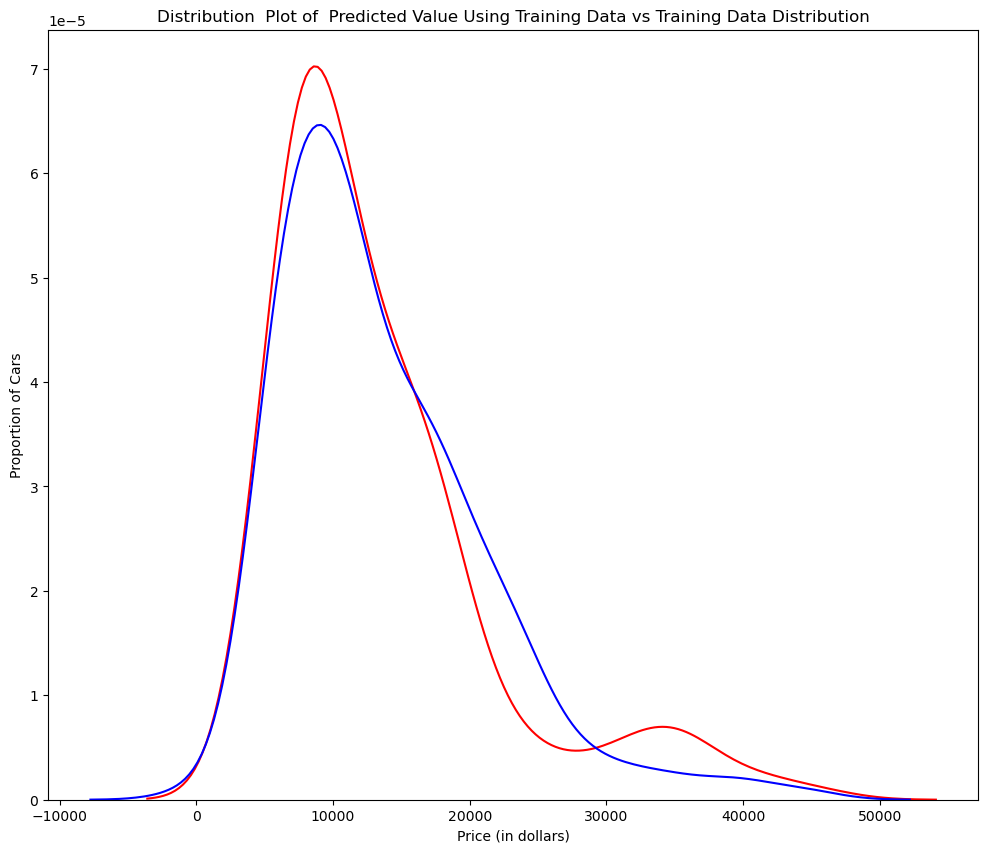

In [82]:
#the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

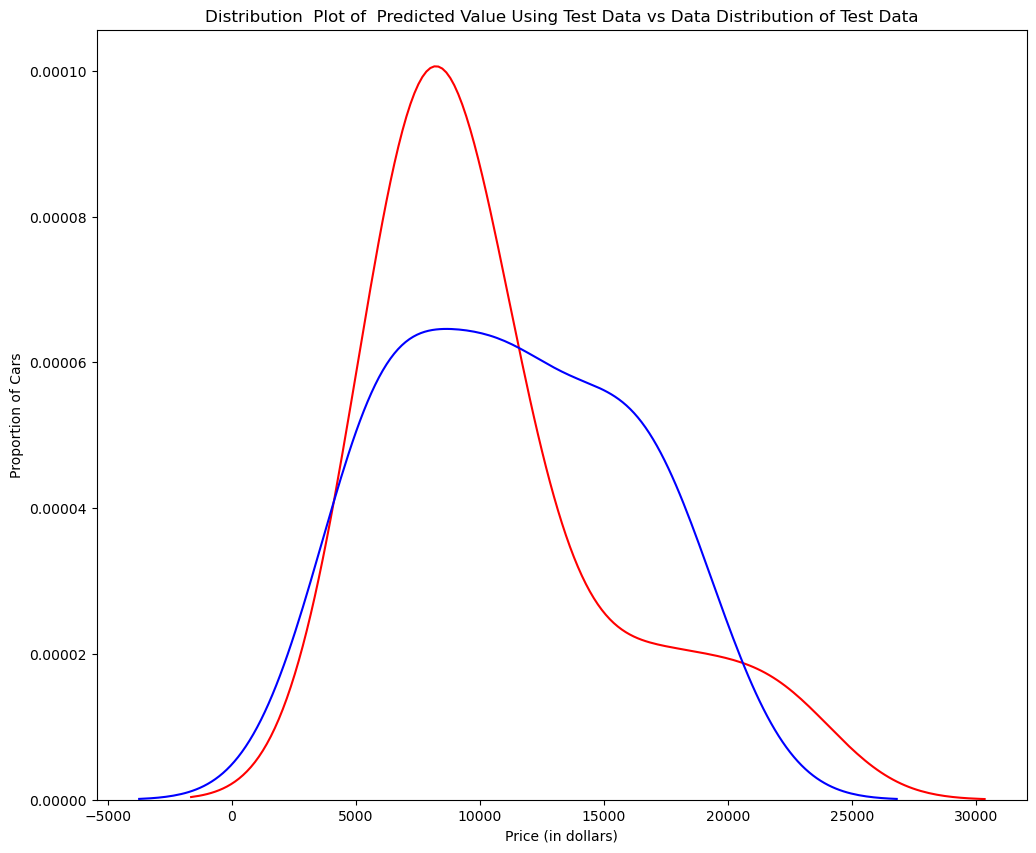

In [83]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

<h3>OVERFITTING</h3>
Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

In [84]:
# Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [85]:
# perform a degree 5 polynomial transformation on the feature 'horsepower':
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [86]:
# create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [87]:
# output of our model using the method "predict." We assign the values to "yhat"
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6722.92974904,  7301.46108578, 12214.17145695, 18901.58988665,
       20000.12992477])

In [88]:
#take the first five predicted values and compare it to the actual targets
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6722.92974904  7301.46108578 12214.17145695 18901.58988665]
True values: [ 6295. 10698. 13860. 13499.]


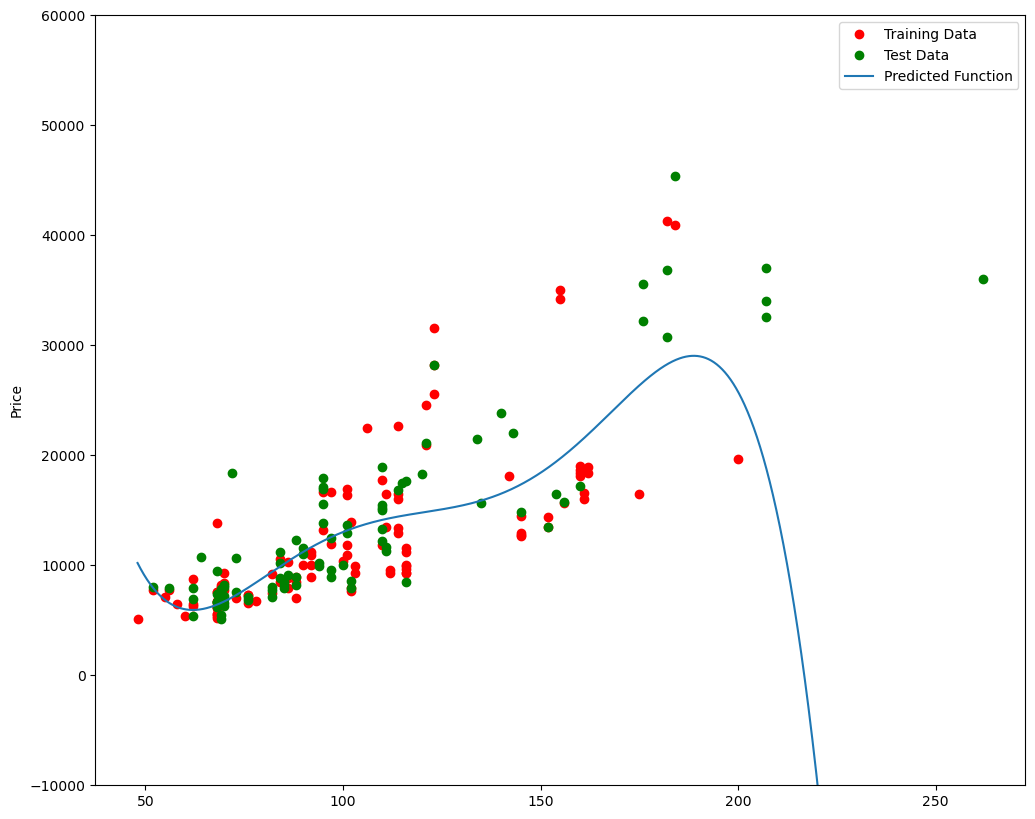

In [89]:
# use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [91]:
# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5571757385281184

In [92]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.62462340735842

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

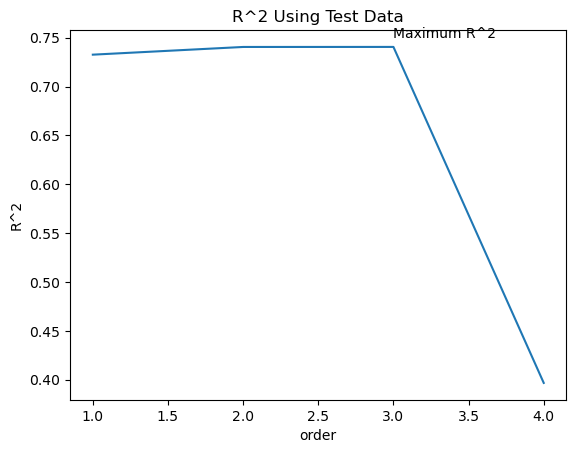

In [95]:
# how the R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lre.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [96]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

In [97]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

##### We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

In [98]:
# Create a "PolynomialFeatures" object "pr1" of degree two.
pr1= PolynomialFeatures(degree=2)

In [99]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

In [100]:
# Shape of new features
x_train_pr1.shape

(110, 15)

In [101]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

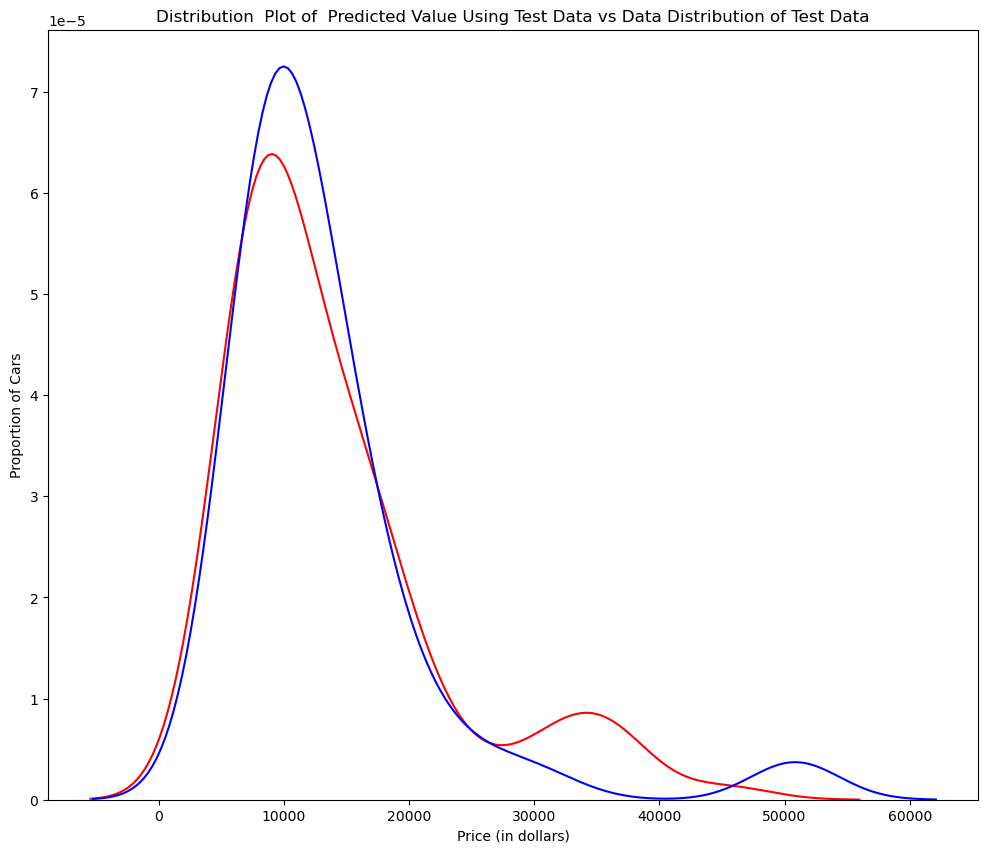

In [102]:
# Use the method "predict" to predict an output on the polynomial features, 
#then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

<h2 id="ref2">Part 3: Ridge Regression</h2>
we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

In [103]:
# import Ridge from the module linear models.
from sklearn.linear_model import Ridge

In [104]:
# create a Ridge regression object, setting the regularization parameter (alpha) to 1
RigeModel=Ridge(alpha=1)

In [105]:
# Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [106]:
# obtain a prediction:

yhat = RigeModel.predict(x_test_pr)

In [107]:
# compare the first four predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 7433.9381129   7821.47371865 11289.85393358 19959.02134467]
test set : [ 6295. 10698. 13860. 13499.]


In [108]:
# We select the value of alpha that minimizes the test error. 
# To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.31it/s, Test Score=0.711, Train Score=0.534]


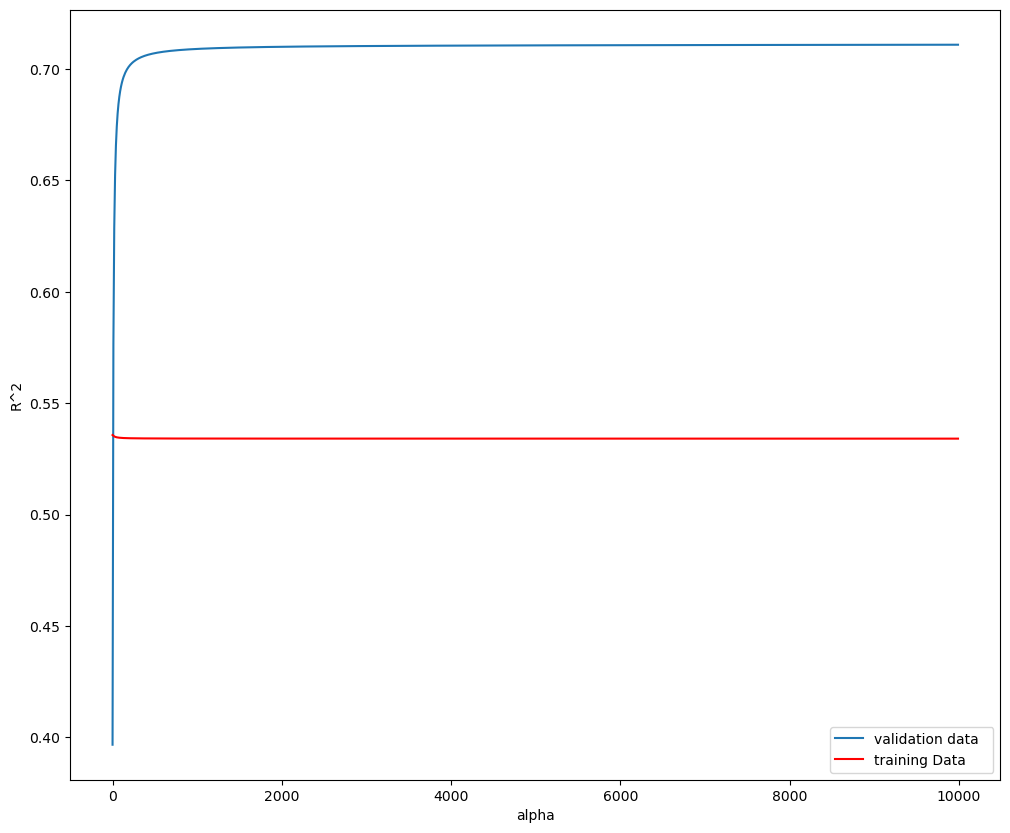

In [109]:
# plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

###  parameter alpha should be set to 10.

In [110]:
RigeModel1=Ridge(alpha=10)

In [111]:
RigeModel1.fit(x_train_pr, y_train)

Ridge(alpha=10)

In [112]:
yhat = RigeModel1.predict(x_test_pr)

In [113]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 7516.60422544  7925.00368515 11325.96448775 19976.49224353]
test set : [ 6295. 10698. 13860. 13499.]


In [114]:
# We select the value of alpha that minimizes the test error. 
# To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel1 = Ridge(alpha=alpha) 
    RigeModel1.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel1.score(x_test_pr, y_test), RigeModel1.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:03<00:00, 278.98it/s, Test Score=0.711, Train Score=0.534]


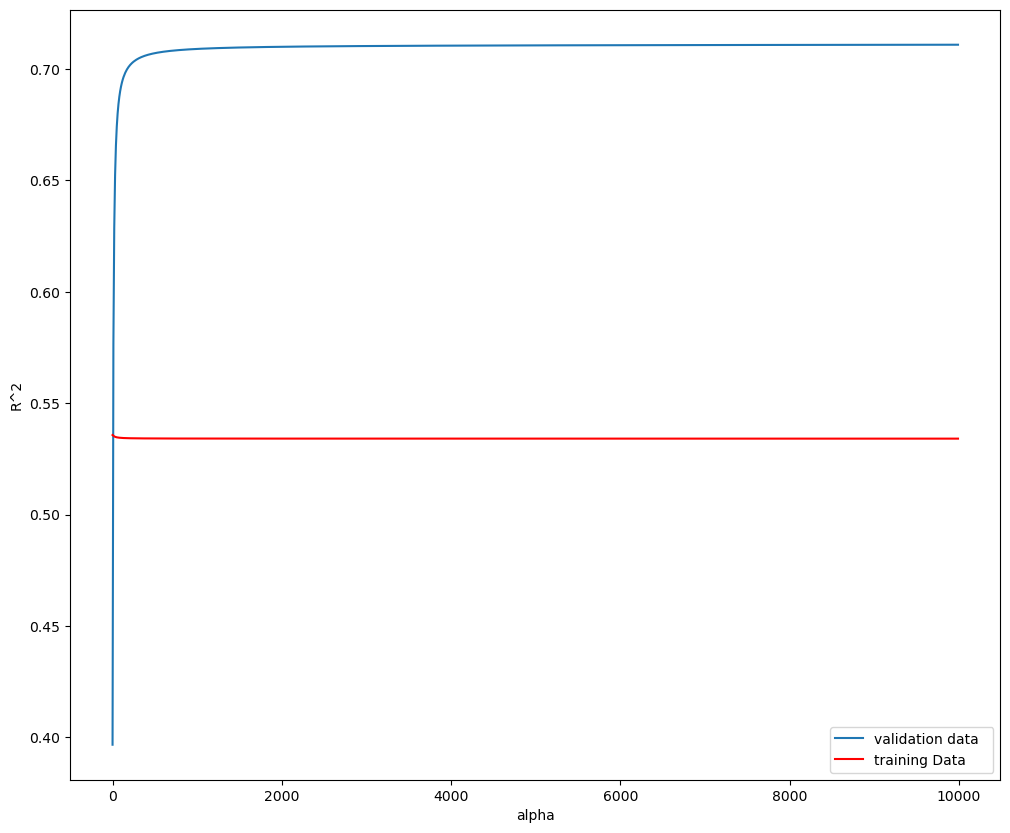

In [115]:
# plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h3 id="ref4">Part 4: Grid Search</h3>
The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


In [116]:
# import GridSearchCV from the module model_selection
from sklearn.model_selection import GridSearchCV

In [117]:
#  create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [118]:
# Create a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [119]:
# Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [122]:
# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [124]:
#The object finds the best parameter values on the validation data. 
#We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [125]:
# test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_test)

0.8412005866981076

In [127]:
# a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)

Ridge(alpha=10000)

<h4>CONCLUSION:<h4><br>
You can see the best model score for test dat with normalization and alpha parameter optimization of <b>0.84</b>